# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [7]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [8]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   
3           GA 2016-04-27 00:53:00          Grades PreK-2   
4           WA 2016-04-27 01:05:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   
2        Literacy & Language                                 Literacy   
3           Applied Learning                        Early Development   
4        Literacy & Language                                 Literacy   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   
2                                            10                    1  329.00   
3                                             2                    1  481.04   
4                                             2                    1   17.74   

   quantity  
0         4  
1         8  
2         1  
3         9  
4        14

## 1.2 preprocessing of `project_subject_categories`

In [9]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.2.1 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

#sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))
#sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))
#sorted_project_grade_dict = dict(sorted(project_grade_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of project_grade_category

In [11]:
sub_catogories = list(project_data['project_grade_category'].values)
project_grade_list = []
for i in sub_catogories:
    temp = i.replace('-','_')
    temp = temp.replace(' ','_')
    project_grade_list.append(temp.strip())
project_data['project_grade_category'] = project_grade_list

In [12]:
print(project_data['project_grade_category'].values)

['Grades_PreK_2' 'Grades_3_5' 'Grades_PreK_2' ... 'Grades_3_5'
 'Grades_9_12' 'Grades_PreK_2']


## 1.4 Text preprocessing

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades_PreK_2   
1           UT 2016-04-27 00:31:25             Grades_3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [15]:
print(project_data['essay'].values[99999])
print("="*50)

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [16]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [18]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [19]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [20]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [21]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:27<00:00, 1251.62it/s]


In [22]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

## 1.4 Preprocessing of `project_title`

In [23]:
# similarly you can preprocess the titles also
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 31064.26it/s]


In [24]:
preprocessed_title[1000]

'empowering students art learning'

## 1.5 Split the data into Train, CV and Test


#### 1.5.1 Data preparation on dataframe 

In [114]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved', 'quantity' ], axis=1)
X.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades_PreK_2   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   

   teacher_number_of_previously_posted_projects   price clean_categories  \
0                                            53  725.05     Math_Science   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   

                                               essay  
0  I have been fortunate enough to use the Fairy ...

#### 1.5.2 Split data into Train, Test and CV

In [115]:
# train test split
from sklearn.model_selection import train_test_split

X = X.fillna(X['teacher_prefix'].value_counts().index[0])

### 1.6 Creating a Datamatrix

In [116]:
feature_names_bow = []

#### 1.6.1 Text features: Essay

##### 1.6.1.1 Text features: Essay_bow

In [117]:

print(X.shape, y.shape)
print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X['essay'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_essay_bow = vectorizer.transform(X['essay'].values)


feature_names_bow.extend(vectorizer.get_feature_names())

print("After vectorizations")
print(X_essay_bow.shape, y.shape)

print("="*100)


(109248, 18) (109248,)
After vectorizations
(109248, 5000) (109248,)


##### 1.6.1.2 Text features: TFIDF

In [118]:
feature_names_tfidf = []

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X['essay']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_essay_tfidf = vectorizer.transform(X['essay'])


print("After vectorizations")
print(X_essay_tfidf.shape, y.shape)
print("="*100)

feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(109248, 17324) (109248,)


##### 1.6.1.3 Text features: AVGW2V

In [120]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [121]:
# average Word2Vec
# compute average word2vec for each review.
##############################################

avg_w2v_vector_X_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_essay.append(vector)
####################################################

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:53<00:00, 2049.43it/s]


##### 1.6.1.4 Text features: TFIDF AVGW2V

In [122]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [123]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_essay.append(vector)

print(len(tfidf_w2v_vectors_X_essay))
print(len(tfidf_w2v_vectors_X_essay[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [10:18<00:00, 176.74it/s]


109248
300


#### 1.6.2 Text features: Project Title

##### 1.6.2.1 Text features: Project Title_BOW

In [124]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_project_bow = vectorizer.transform(X['project_title'].values)

print("After vectorizations")
print(X_project_bow.shape, y.shape)
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())

After vectorizations
(109248, 5000) (109248,)


##### 1.6.1.2 Text features: TFIDF

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X['project_title']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_project_tdidf = vectorizer.transform(X['project_title'])


print("After vectorizations")
print(X_project_tdidf.shape, y.shape)

print("="*100)

feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(109248, 3349) (109248,)


##### 1.6.1.3 Text features: AVGW2V

In [126]:
# average Word2Vec
# compute average word2vec for each review.
##############################################

avg_w2v_vector_X_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_Title.append(vector)
####################################################

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 91041.95it/s]


##### 1.6.1.4 Text features: TFIDF_AVGW2V

In [127]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [128]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_title.append(vector)

print(len(tfidf_w2v_vectors_X_title))
print(len(tfidf_w2v_vectors_X_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 63139.27it/s]


109248
300


#### 1.6.3 catogorical features: state

In [129]:
vectorizer = CountVectorizer()
vectorizer.fit(X['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_state_ohe = vectorizer.transform(X['school_state'].values)

print("After vectorizations")
print(X_state_ohe.shape, y.shape)
print(vectorizer.get_feature_names())

print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(109248, 51) (109248,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


#### 1.6.4 catogorical features: tearcher_prefix

In [130]:
vectorizer = CountVectorizer()
vectorizer.fit(X['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_teacher_ohe = vectorizer.transform(X['teacher_prefix'].values)

print("After vectorizations")
print(X_teacher_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(109248, 5) (109248,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


#### 1.6.5 catogorical features: project_grade_category

In [131]:
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w\w+(?:\-\@\@\-)?\w+\b')
#vectorizer = CountVectorizer(token_pattern=r'(?u)\\b[\\w-]+\\b')
print(vectorizer)
vectorizer.fit(X['project_grade_category'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_grade_ohe = vectorizer.transform(X['project_grade_category'].values)

print("After vectorizations")
print(X_grade_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+(?:\\-\\@\\@\\-)?\\w+\\b',
                tokenizer=None, vocabulary=None)
After vectorizations
(109248, 4) (109248,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


#### 1.6.6 catogorical features: clean_categories

In [132]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer()

vectorizer.fit(X['clean_categories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_CC_ohe = vectorizer.transform(X['clean_categories'].values)
print("After vectorizations")
print(X_CC_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(109248, 9) (109248,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


#### 1.6.7 catogorical features: clean_subcategories

In [133]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer()

vectorizer.fit(X['clean_subcategories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_SC_ohe = vectorizer.transform(X['clean_subcategories'].values)

print("After vectorizations")
print(X_SC_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(109248, 30) (109248,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


#### 1.6.8 Normalizing the numerical features: Price

In [134]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['price'].values.reshape(1,-1))

X_price_norm = normalizer.transform(X['price'].values.reshape(1,-1))
X_price_norm = X_price_norm.reshape(-1,1)

In [135]:
feature_names_bow.extend(['price'])
feature_names_tfidf.extend(['price'])

In [136]:
print(X_price_norm)

[[4.63560392e-03]
 [1.36200635e-03]
 [2.10346002e-03]
 ...
 [2.55100471e-03]
 [1.83960046e-03]
 [3.51642253e-05]]


#### 1.6.9 Normalizing the numerical features: teacher_number_of_previously_posted_projects

In [137]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_previously_posted_norm = normalizer.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")

X_previously_posted_norm = X_previously_posted_norm.reshape(-1,1)

print(X_previously_posted_norm.shape, y.shape)
print("="*100)

feature_names_bow.extend(['teacher_number_of_previously_posted_projects'])
feature_names_tfidf.extend(['teacher_number_of_previously_posted_projects'])

After vectorizations
(109248, 1) (109248,)


In [138]:
print(X_previously_posted_norm)

[[0.00535705]
 [0.00040431]
 [0.00101076]
 ...
 [0.        ]
 [0.00010108]
 [0.00020215]]


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

### Step 1 Choosing TFIDF vectorizer 

In [139]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X_TFIDF = hstack((X_essay_tfidf,X_project_tdidf,X_state_ohe,X_teacher_ohe,X_grade_ohe,X_CC_ohe,X_SC_ohe,X_price_norm,X_previously_posted_norm)).tocsr()
              
print("Final Data matrix")
print(X_TFIDF.shape, y.shape)
print("="*100)

Final Data matrix
(109248, 20774) (109248,)


### Step 2 Choosing the 5k best features 

In [140]:
from sklearn.feature_selection import SelectKBest, chi2
X_TFIDF_ReducedFetures =SelectKBest(score_func=chi2,k=5000).fit_transform(X_TFIDF,y)

In [141]:
X_TFIDF_ReducedFetures

<109248x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 8099325 stored elements in Compressed Sparse Row format>

#### As per review comments selecting 10k, 10k and 15 rows for KMeans, agglomerative and DBSCAN respectively

In [142]:
import random
i = random.sample(range(1, 109248), 10000)
j = random.sample(range(1, 109248), 15000)

In [143]:
X_TFIDF_KMeans_Agglo = X_TFIDF_ReducedFetures.tocsr()[i,:].todense()

In [144]:
X_TFIDF_DBSCAN = X_TFIDF_ReducedFetures.tocsr()[j,:].todense()

### Step 3 K-Means

#### 1) Using elbow-knee method to find k value

In [145]:
from sklearn.cluster import KMeans

In [146]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_TFIDF_KMeans_Agglo)
    Sum_of_squared_distances.append(km.inertia_)

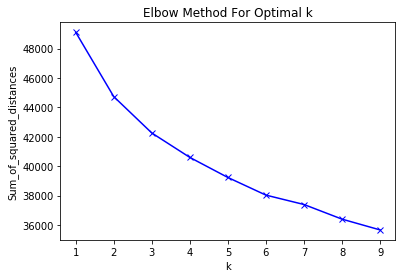

In [147]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Selecting K=7 as best hyper parameter

#### 3) Using elbow-knee method to find eps value

In [148]:
from sklearn.decomposition import TruncatedSVD
# reduced_data = TruncatedSVD(n_components=2).fit_transform(X_TFIDF_KMeans_Agglo)

In [149]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors is 2 times number of dimesions in the processed data
neigh = NearestNeighbors(n_neighbors=10000)
nbrs = neigh.fit(X_TFIDF_KMeans_Agglo)
distances, indices = nbrs.kneighbors(X_TFIDF_KMeans_Agglo)

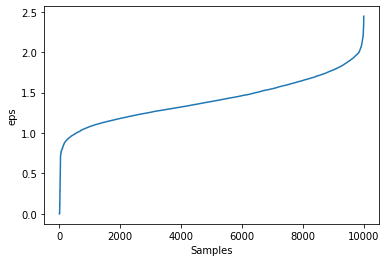

In [150]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Samples')
plt.ylabel('eps')
plt.plot(distances)

#### Setting eps value to 1.8


### Step 4

#### 1) K-Means(Observing clusters with data points)

In [151]:
from sklearn.decomposition import TruncatedSVD
reduced_data = TruncatedSVD(n_components=2).fit_transform(X_TFIDF_KMeans_Agglo)
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=100, n_init=1, verbose=False)
kmeans.fit(X_TFIDF_KMeans_Agglo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=False)

In [152]:
reduced_data

array([[ 0.41971999, -0.27518133],
       [ 0.29299986, -0.01301075],
       [ 0.42500305, -0.26270856],
       ...,
       [ 1.56078658, -0.54341032],
       [ 0.72934193,  0.29886643],
       [ 0.95775632,  0.35375528]])

In [153]:
y_kmeans = kmeans.predict(X_TFIDF_KMeans_Agglo)

In [154]:
y_kmeans

array([3, 4, 4, ..., 6, 3, 6])

Text(0.5, 1.0, 'K-means')

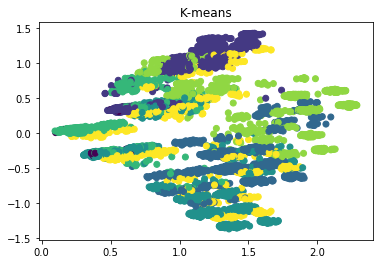

In [155]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],c = y_kmeans)
plt.title("K-means")

#### 2) Agglomerative Clustering(Observing cluster with data points)

In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
 
reduced_data = TruncatedSVD(n_components=2).fit_transform(X_TFIDF_KMeans_Agglo)
hier = AgglomerativeClustering(n_clusters=7)
y_pred = hier.fit_predict(X_TFIDF_KMeans_Agglo)

Text(0.5, 1.0, 'Hierarchical')

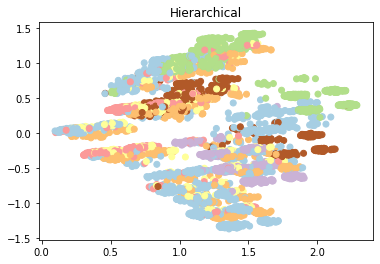

In [214]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=y_pred, cmap='Paired')
plt.title("Hierarchical")

#### 3) DBSCAN Clustering(Observing cluster with data points)

In [215]:
from sklearn.cluster import DBSCAN

reduced_data = TruncatedSVD(n_components=2).fit_transform(X_TFIDF_DBSCAN)


#### EPS is taken from elbow knee graph and tried different eps with min_samples, I couldn't differentiate clusters, I could see all data points in same cluster

Text(0.5, 1.0, 'DBSCAN')

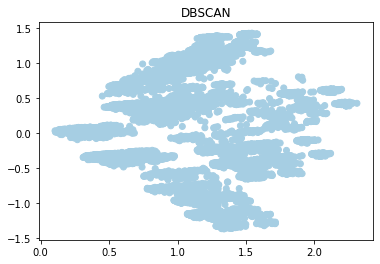

In [217]:
db = DBSCAN(eps=1.1, min_samples=10000)
y_pred = db.fit_predict(X_TFIDF_DBSCAN)

plt.scatter(reduced_data[:,0],reduced_data[:,1],c = y_pred, cmap='Paired')
plt.title("DBSCAN")

### Step 5

##### WordClod function defination

##### Copied from https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

In [184]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#### 5.1 WordCloud for essay text with KMeans

#### Here I have taken 10k rows with 2000 featuers for Essay text to plot word clouds this is because computation taking lot of time

In [185]:
SampledData =  project_data.sample(n=10000)

In [186]:
y = SampledData['project_is_approved'].values 
X = SampledData.drop(['project_is_approved', 'quantity' ], axis=1) 
X.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
27269      170644  p255294  e24f1fcc3554894a4654baac08f692b0           Mrs.   

      school_state                Date project_grade_category  \
27269           CT 2016-08-10 18:51:13          Grades_PreK_2   

                                        project_title  \
27269  Our Target: Flexible Seating For All Learners!   

                                         project_essay_1  \
27269  I teach kindergarteners between he ages of 4 a...   

                                         project_essay_2 project_essay_3  \
27269  I found this past school year that my students...             NaN   

      project_essay_4                           project_resource_summary  \
27269             NaN  My students need flexible seating options such...   

       teacher_number_of_previously_posted_projects   price clean_categories  \
27269                                             4  255.66    Health_Sports   

               clean_subcategories  \
27269  Gym_Fitness Health_Wellness   

                                                   essay  
27269  I teach kindergarteners between he ages of 4 a...

In [187]:
X_EssayText = X

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(min_df=10) 
vectorizer.fit(X_EssayText['essay']) 

feature_names_tfidf_essay = [] 
# we use the fitted CountVectorizer to convert the text to vector 
X_essay_tfidf = vectorizer.transform(X_EssayText['essay'])
print("After vectorizations") 
print(X_essay_tfidf.shape, y.shape) 
print("="*100)
feature_names_tfidf_essay.extend(vectorizer.get_feature_names())

After vectorizations
(10000, 6399) (10000,)


In [189]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import KMeans
X_TFIDF_Essay=SelectKBest(score_func=chi2,k=2000).fit_transform(X_essay_tfidf,y)

In [190]:
km = KMeans(n_clusters=7,init='k-means++')
km.fit(X_TFIDF_Essay)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [191]:
preprocessed_essays = X_EssayText['essay'].tolist()

### Generic function to plot all word clouds with most occuring words

#### 1) As per review comments selecting most frequet words for each cluster and printing
#### 2) "CommonWords" contains common words of all clusters, selecting top 100 words

In [207]:
def Wordplot(labels_):
    a = " "
    b = " "
    c = " "
    d = " "
    e = " "
    f = " "
    g = " " 
    CommonWords= " "
    for index in range(len(labels_)):
        if List[index] == 0:
            a += '' + preprocessed_essays[index]
        elif List[index] == 1:
            b += '' + preprocessed_essays[index]
        elif List[index] == 2:
            c += '' + preprocessed_essays[index]
        elif List[index] == 3:
            d += '' + preprocessed_essays[index]
        elif List[index] == 4:
            e += '' + preprocessed_essays[index]
        elif List[index] == 5:
            f += '' +  preprocessed_essays[index]
        elif List[index]== 6:
            g += '' + preprocessed_essays[index]
        CommonWords += ''+ preprocessed_essays[index]
    # split() returns list of all the words in the string 
    split_it_a = a.split() 
    Counter_a = Counter(split_it_a)  
    most_occur_a = Counter_a.most_common(100)
    
    split_it_b = b.split() 
    Counter_b = Counter(split_it_b)  
    most_occur_b = Counter_b.most_common(100) 
  
    split_it_c = c.split() 
    Counter_c = Counter(split_it_c)  
    most_occur_c = Counter_c.most_common(100) 
    
    split_it_d = d.split() 
    Counter_d = Counter(split_it_d)  
    most_occur_d = Counter_d.most_common(100) 
    
    split_it_e = e.split() 
    Counter_e = Counter(split_it_e)  
    most_occur_e = Counter_e.most_common(100) 
    
    split_it_f = f.split() 
    Counter_f = Counter(split_it_f)  
    most_occur_f = Counter_f.most_common(100) 
    
    split_it_g = g.split() 
    Counter_g = Counter(split_it_g)  
    most_occur_g = Counter_g.most_common(100)
    
    split_it_CommonWords = CommonWords.split() 
    Counter_CommonWords = Counter(split_it_CommonWords)  
    most_occur_CommonWords = Counter_CommonWords.most_common(100)
    
    show_wordcloud(most_occur_a, title = "Cluster 0")
    show_wordcloud(most_occur_b, title = "Cluster 1")
    show_wordcloud(most_occur_c, title = "Cluster 2")
    show_wordcloud(most_occur_d, title = "Cluster 3")
    show_wordcloud(most_occur_e, title = "Cluster 4")
    show_wordcloud(most_occur_f, title = "Cluster 5")
    show_wordcloud(most_occur_g, title = "Cluster 6")
    show_wordcloud(most_occur_CommonWords, title = "Most Common Word among all clusters")

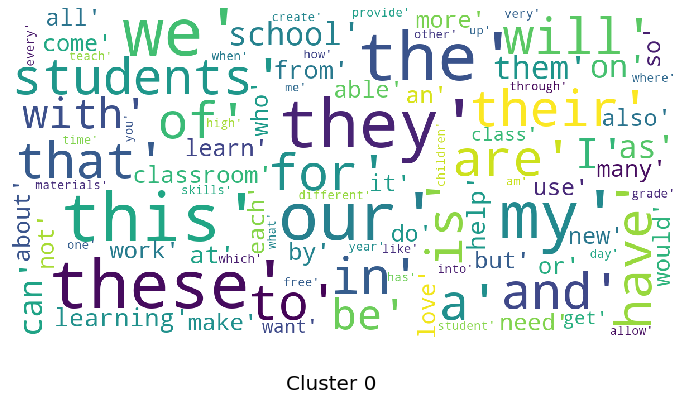

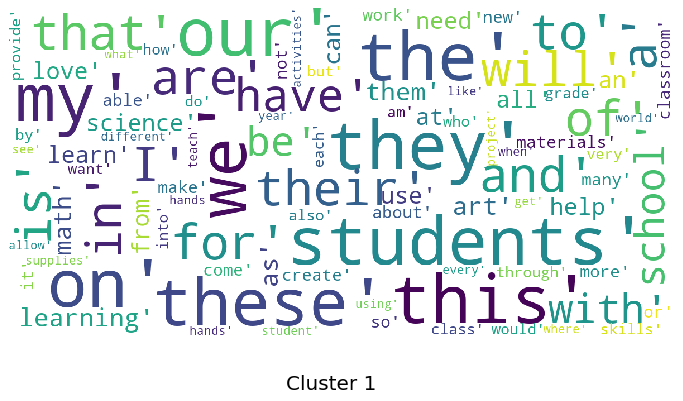

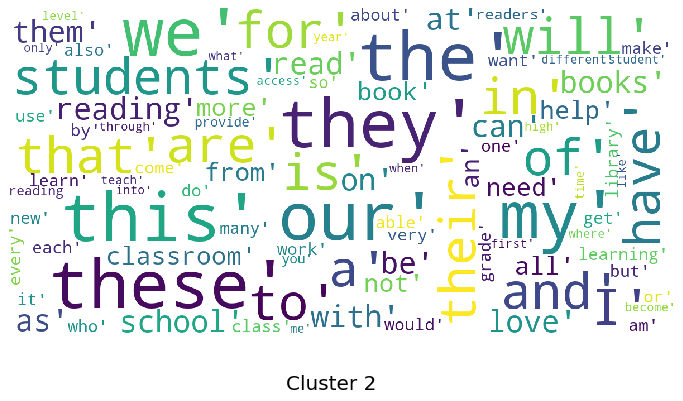

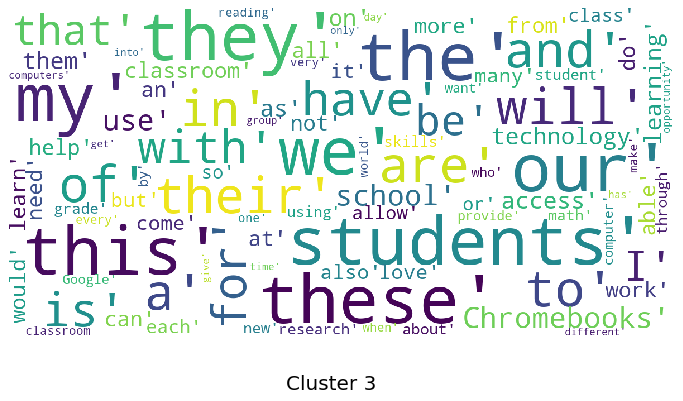

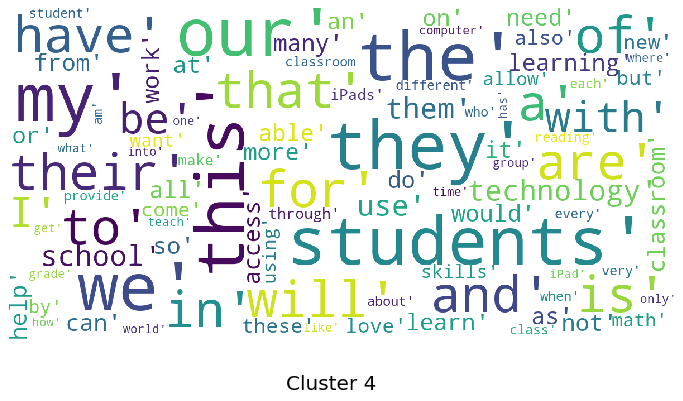

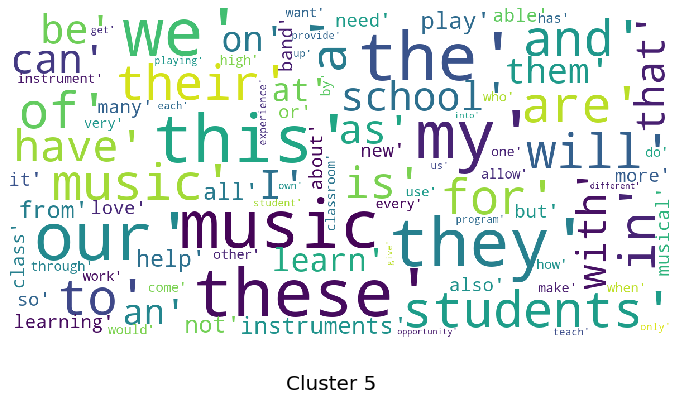

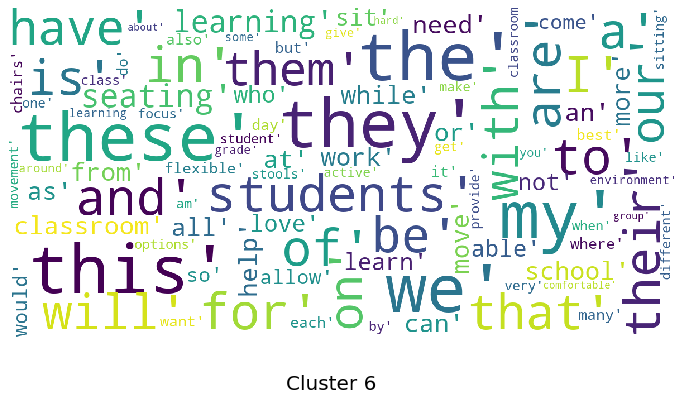

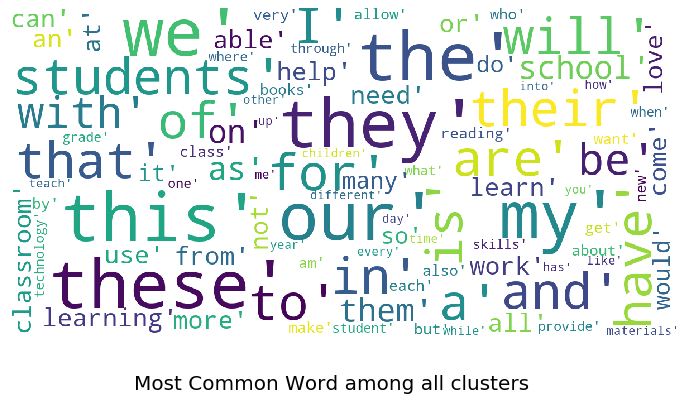

In [208]:
List = km.labels_ 
Wordplot(List)

In [209]:
reduced_data = TruncatedSVD(n_components=2).fit_transform(X_TFIDF_KMeans_Agglo)
hier = AgglomerativeClustering(n_clusters=7)
y_pred = hier.fit_predict(reduced_data)

#### As per review comments plotting Dendogram for agglomerative 

####  we couldn't cleary see text data on x axis due to more no of labels

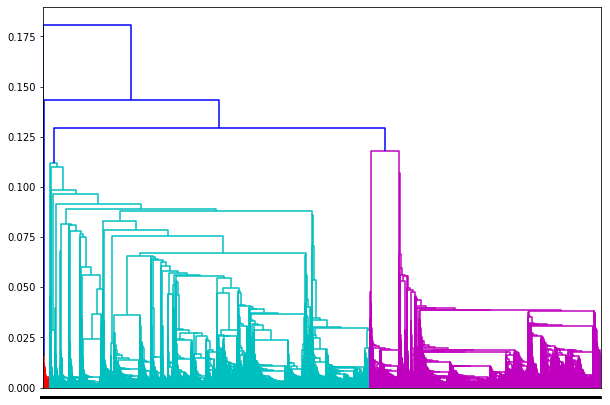

In [203]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(reduced_data, 'single')

labelList = hier.labels_

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [210]:
from sklearn.cluster import DBSCAN
Clustering_DB = DBSCAN(eps=1.8, min_samples=10000).fit(X_TFIDF_Essay)

In [211]:
DB_List = Clustering_DB.labels_

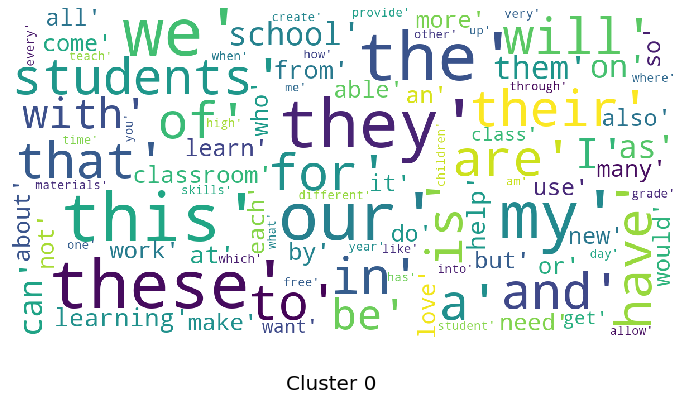

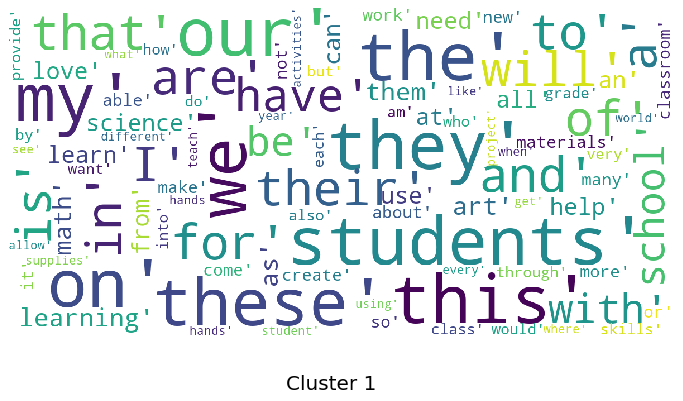

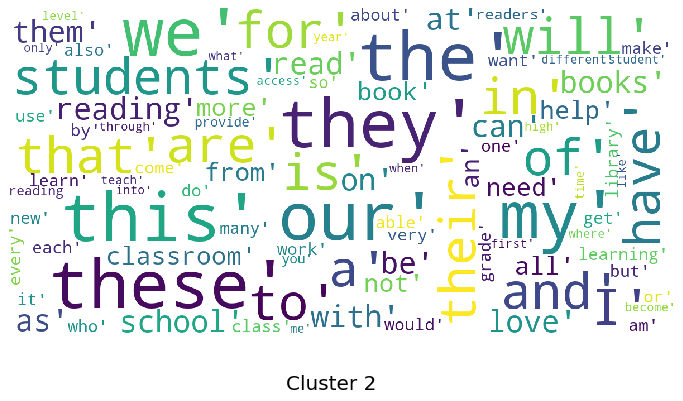

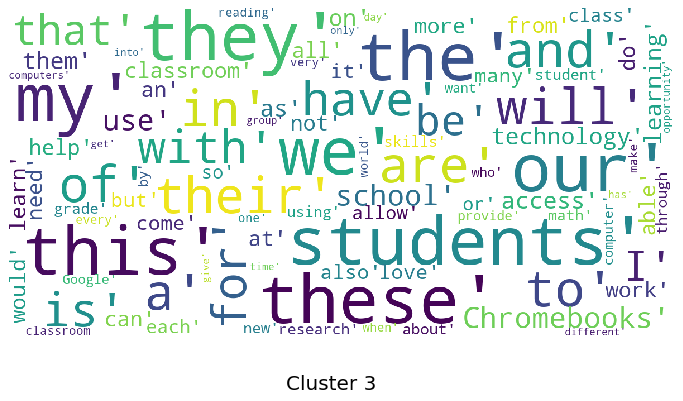

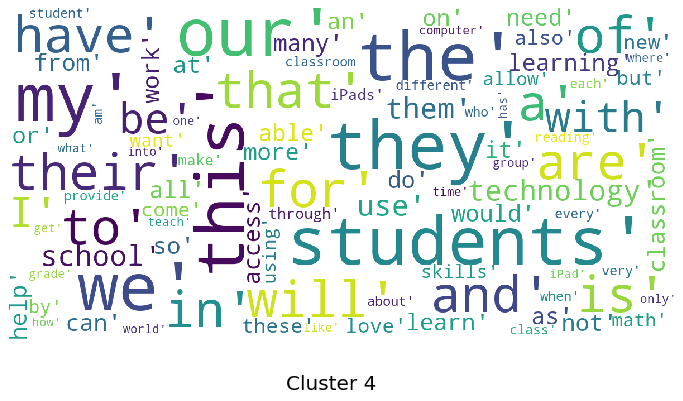

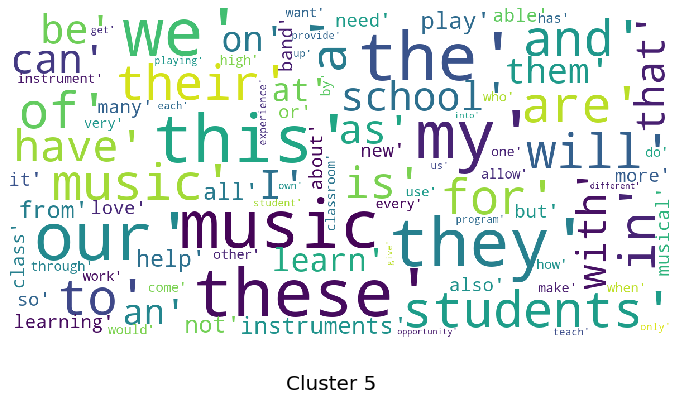

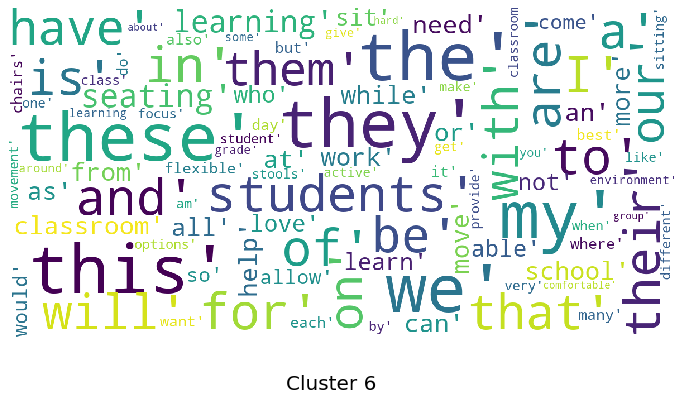

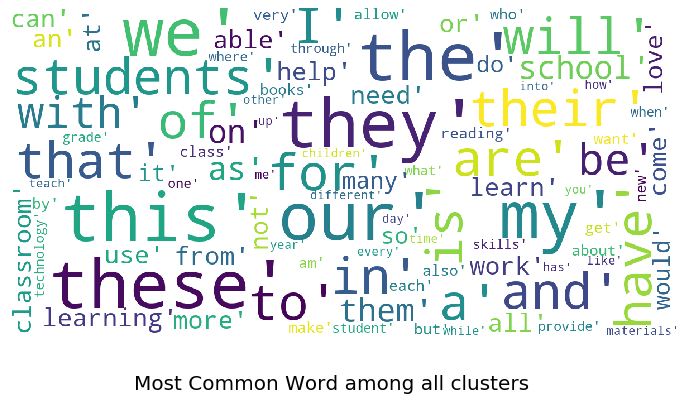

In [212]:
Wordplot(DB_List)